# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

In [60]:

# Define an empty list to fetch the weather data for each city
city_data = []
metric = "metric"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key  + "&q=" + city + "&units=" + metric
    

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | midvagur
Processing Record 4 of Set 1 | smithers
Processing Record 5 of Set 1 | haiku-pauwela
Processing Record 6 of Set 1 | huron
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | hailar
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | visby
Processing Record 11 of Set 1 | brisas de zicatela
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | white river
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | namdrik
Processing Record 17 of Set 1 | rumbek
Processing Record 18 of Set 1 | nanning
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | port elizabeth
Processing Record 

In [61]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [62]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.67,85,100,6.84,PN,1712791119
1,port-aux-francais,-49.3500,70.2167,7.44,96,100,3.79,TF,1712791120
2,midvagur,62.0511,-7.1939,6.46,87,100,12.35,FO,1712791020
3,smithers,54.7804,-127.1743,8.18,46,100,5.66,CA,1712791590
4,haiku-pauwela,20.9219,-156.3051,29.01,62,20,8.23,US,1712791590


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [64]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.67,85,100,6.84,PN,1712791119
1,port-aux-francais,-49.3500,70.2167,7.44,96,100,3.79,TF,1712791120
2,midvagur,62.0511,-7.1939,6.46,87,100,12.35,FO,1712791020
3,smithers,54.7804,-127.1743,8.18,46,100,5.66,CA,1712791590
4,haiku-pauwela,20.9219,-156.3051,29.01,62,20,8.23,US,1712791590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

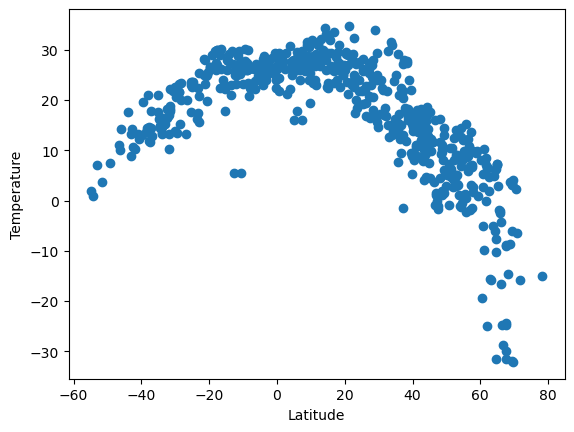

<Figure size 640x480 with 0 Axes>

In [65]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

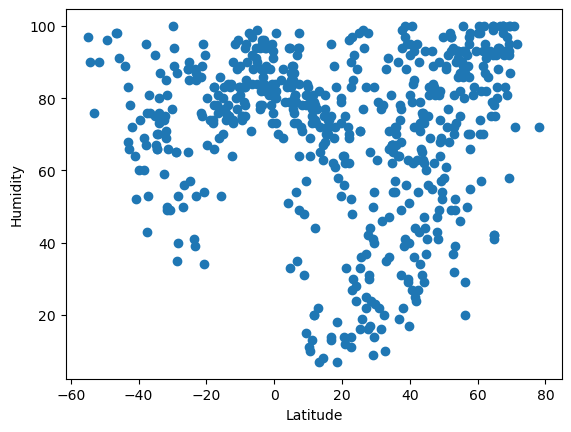

<Figure size 640x480 with 0 Axes>

In [66]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

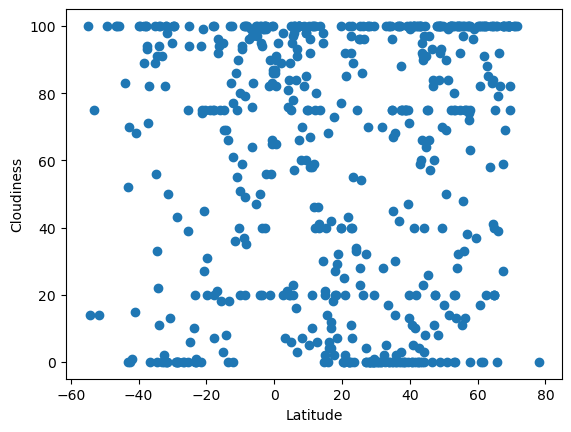

<Figure size 640x480 with 0 Axes>

In [67]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

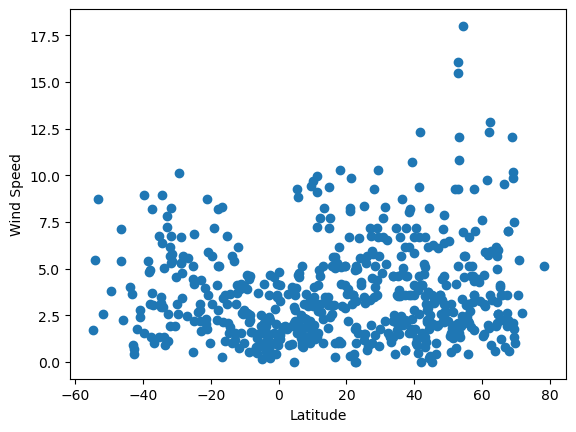

<Figure size 640x480 with 0 Axes>

In [68]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)



City_ID
0      3.407724
1      3.226202
2      4.058919
3      4.004571
4      3.751481
         ...   
574    3.649533
575    3.923739
576    3.933501
577    4.027032
578    3.673424
Name: Lat, Length: 579, dtype: float64
y = 0.01x +3.6


The r-value is: 0.00796929471066402


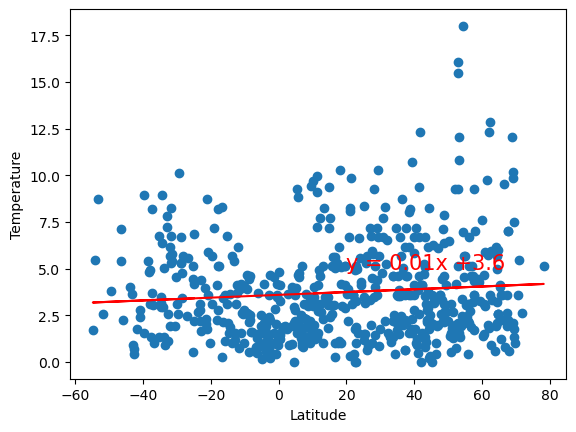

In [70]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_lat=[]
for x in city_data_df["Lat"]:
    if x >= 0:
      northern_hemi_lat.append(x)
northern_hemi_lat_df = pd.DataFrame(northern_hemi_lat)
northern_hemi_lat_df = northern_hemi_lat_df.rename(columns={0: 'Lat'})
northern_hemi_lat_df.head()


,Lat
0,62.0511
1,54.7804
2,20.9219
3,41.1501
4,62.4560


In [72]:
# Display sample data
northern_hemi_df = pd.merge(city_data_df, northern_hemi_lat_df, on = "Lat")
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,midvagur,62.0511,-7.1939,6.46,87,100,12.35,FO,1712791020
1,smithers,54.7804,-127.1743,8.18,46,100,5.66,CA,1712791590
2,haiku-pauwela,20.9219,-156.3051,29.01,62,20,8.23,US,1712791590
3,huron,41.1501,-82.5499,14.82,85,100,3.84,US,1712791591
4,yellowknife,62.4560,-114.3525,1.90,82,20,3.60,CA,1712791121
...,...,...,...,...,...,...,...,...,...
403,bonga,7.2833,36.2333,16.03,98,66,0.78,ET,1712791762
404,imperia,43.9667,7.7833,13.67,75,91,3.76,IT,1712791763
405,saint john,45.2727,-66.0677,4.57,75,75,3.60,CA,1712791306
406,kirensk,57.7853,108.1119,2.76,98,100,3.58,RU,1712791205


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_lat=[]
for x in city_data_df["Lat"]:
    if x < 0:
      southern_hemi_lat.append(x)
southern_hemi_lat_df = pd.DataFrame(southern_hemi_lat)
southern_hemi_lat_df = southern_hemi_lat_df.rename(columns={0: 'Lat'})
southern_hemi_lat_df.head()


,Lat
0,-25.0660
1,-49.3500
2,-37.0676
3,-54.2811
4,-25.3318


In [74]:
# Display sample data
southern_hemi_df = pd.merge(city_data_df, southern_hemi_lat_df, on = "Lat")
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.67,85,100,6.84,PN,1712791119
1,port-aux-francais,-49.3500,70.2167,7.44,96,100,3.79,TF,1712791120
2,edinburgh of the seven seas,-37.0676,-12.3116,17.81,81,82,3.04,SH,1712791007
3,grytviken,-54.2811,-36.5092,0.94,90,14,5.44,GS,1712791004
4,white river,-25.3318,31.0117,17.53,88,75,0.51,ZA,1712791593
...,...,...,...,...,...,...,...,...,...
172,lebu,-37.6167,-73.6500,11.80,76,93,1.34,CL,1712791109
173,whakatane,-37.9585,176.9854,21.05,95,100,4.92,NZ,1712791761
174,aragarcas,-15.8975,-52.2508,24.05,86,75,1.11,BR,1712791761
175,fortaleza,-3.7227,-38.5247,28.07,78,20,0.51,BR,1712790901


###  Temperature vs. Latitude Linear Regression Plot

y = -0.57x +35.08
The r-value is: 0.7053325873790968


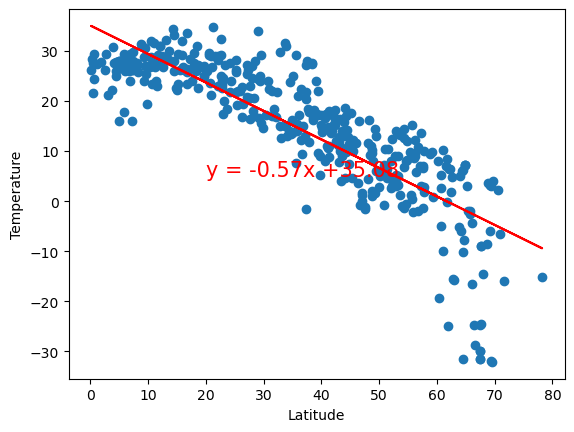

In [75]:
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.36x +28.78
The r-value is: 0.6122004142521412


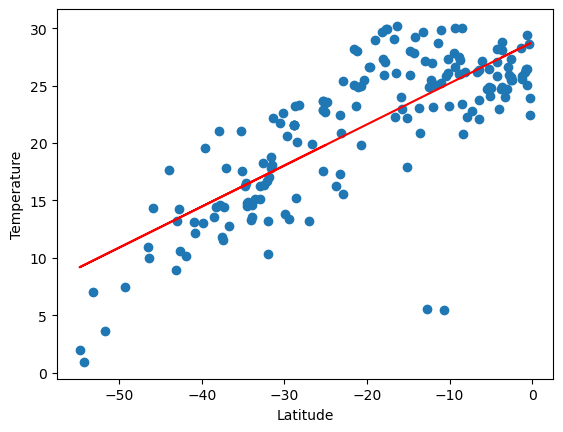

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Based on the linear regression for both the northern and southern hemispheres it seems that the closer you get the the equator the hotter it becomes reaching a peak at 0 degrees latitude.

### Humidity vs. Latitude Linear Regression Plot

y = 0.29x +57.31
The r-value is: 0.05583664109625277


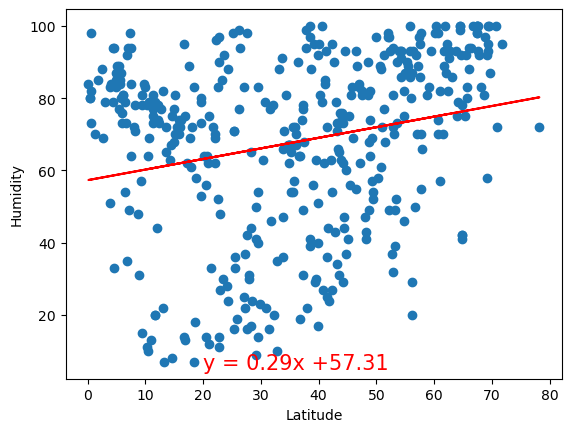

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.3x +83.94
The r-value is: 0.08800233421040385


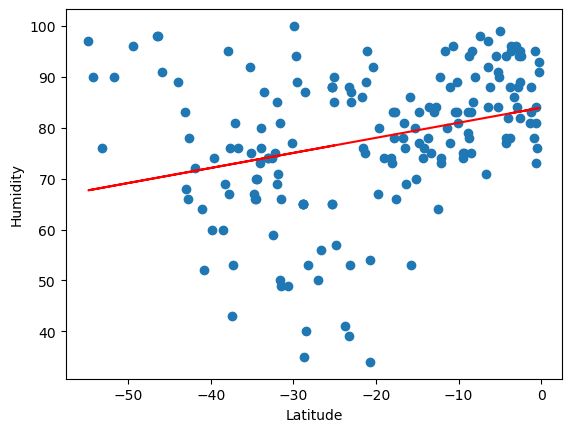

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Based on the linear regression for the northern hemisphere humidity maintains a very large range that scales higher the the latitude. This is the same for the southern hemisphere data as well but the difference is that the southern data shows that it is a smaller more concentrated range for humidity.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.28x +47.79
The r-value is: 0.019573449483177862


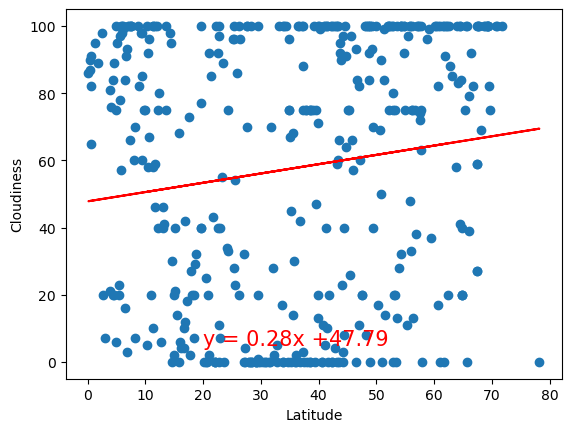

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.49x +70.05
The r-value is: 0.03213661245931654


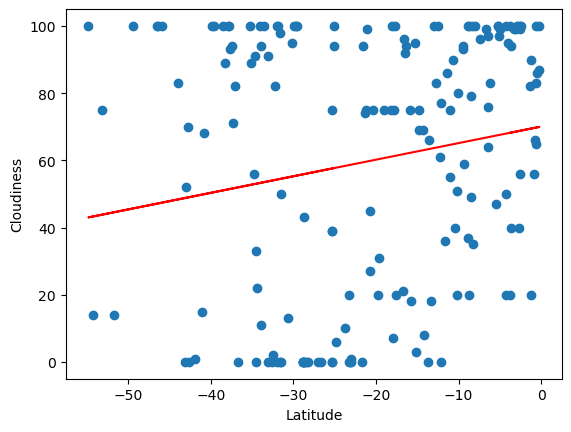

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Its hard to see any relation for cloudiness based upon what the latitude is however it does seem that the southern hemishpere gets cloudier the closer to 0 degrees latitude you get however it is a small bump and may not be accurate of a continued trend. 

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x +3.36
The r-value is: 0.011427067853246608


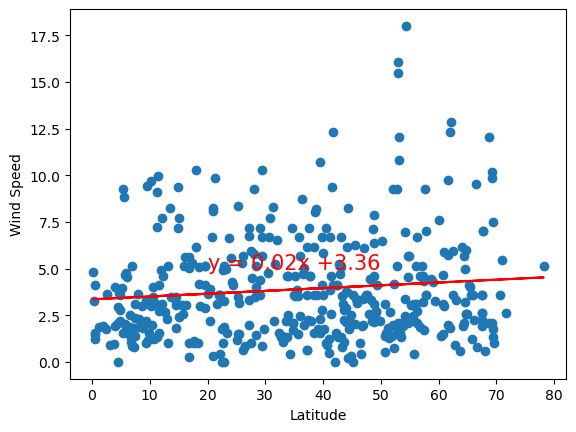

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = -0.06x +2.25
The r-value is: 0.12515915916997017


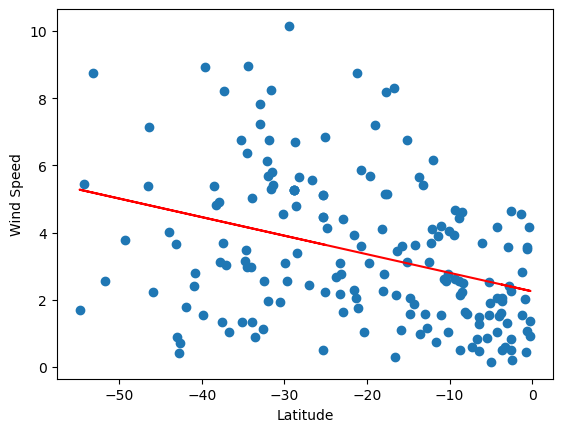

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The first thing that stuck out was that wind speed seems to increase in the northern hemisphere but slows down going towards the equator. The closer to the poles you get on both hemispheres seems to increase.